In [1]:
from ugropy import abdulelah_gani_p, instantiate_mol_object

import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

In [3]:
# for idx, smiles in enumerate(df.index):
#     try:
#         solution = abdulelah_gani_p.get_groups(smiles, "smiles")
#         solution.subgroups_numbers
#     except:
#         print(smiles)
#         print(idx)
#         print(df.loc[smiles, "Compound"])
#         break

In [4]:
primary = np.linspace(1, 220, 220, dtype=int).astype(str)

In [5]:
df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [6]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_p.get_groups(smiles, "smiles")
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()
    
    # Comparar con los subgrupos calculados
    if solution.subgroups_numbers != row_dict:
        print(smiles)
        print(idx)
        print(solution.subgroups)
        print(solution.subgroups_numbers)
        print(row_dict)
        
        wrong_smiles = smiles
        break


Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F
20
{'aC fused with aromatic ring': 2, 'CF3': 1, 'aC-Br': 4, 'NH (cyclic)': 1, 'C=N (cyclic)': 1}
{16: 2, 119: 1, 126: 4, 175: 1, 178: 1}
{17: 2, 119: 1, 126: 4, 175: 1, 178: 1}


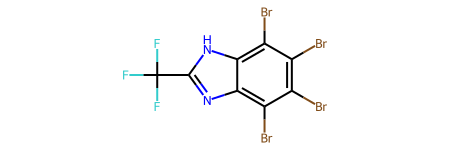

In [7]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

mol

In [8]:
wrong_smiles

'Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F'

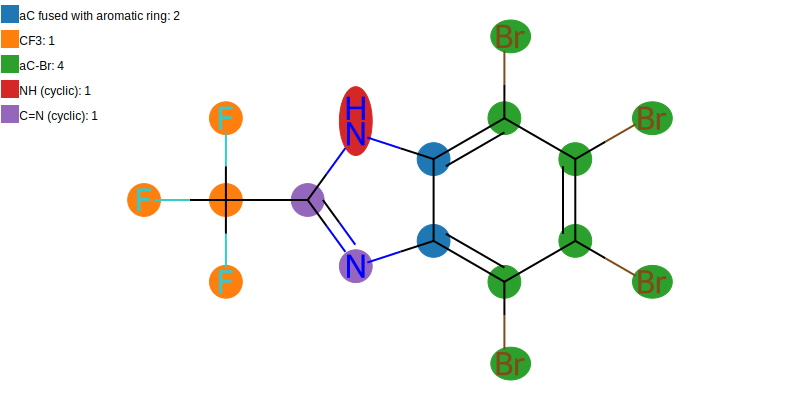

In [9]:
sol = abdulelah_gani_p.get_groups(wrong_smiles, "smiles")

sol.draw(width=800, height=400)

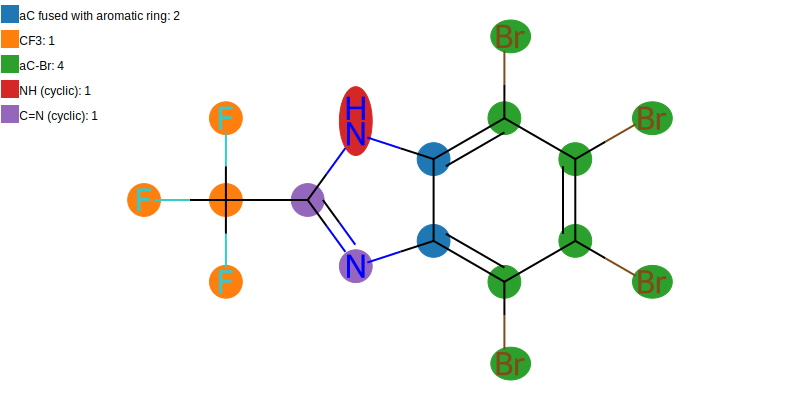

In [12]:
smiles="Brc1c(Br)c(Br)c2N=C(Nc2c1Br)C(F)(F)F"

mol = abdulelah_gani_p.get_groups(smiles, "smiles")

mol.draw(width=800, height=400)

In [11]:
df[df[207]>0][176]

SMILES
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCN(C)CC3        2
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCNC(C)C3        1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(cc12)N3CCNCC3           1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)c(F)c12     2
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNC(C)C3)c(F)c12     1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)c(F)c12        1
CCn1cc(C(=O)O)c(=O)c2cc(F)c(nc12)N3CCNCC3           1
CCn1cc(C(=O)O)c(=O)c2cc3OCOc3cc12                   0
CCn1cc(C(=O)O)c(=O)c2ccc(C)nc12                     0
CCn1cc(C(=O)O)c(=O)c2cnc(nc12)N3CCNCC3              1
CCn1cc(C(=O)OCOC(=O)C)c(=O)c2ccc(C)nc12             0
CN1CCN(CC1)c2c(F)cc3c(=O)c(cn4C(C)COc2c34)C(=O)O    2
Fc1cc2CCC(C)n3cc(C(=O)O)c(=O)c(c1)c23               0
FCCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCN(C)CC3)c(F)c12    2
O=c1ccn(C)c2ccccc12                                 0
O=c1n2C=CC=Cc2nc3ccccc13                            0
O=c1n2CCCCc2nc3ccccc13                              0
O=c1n2CCCCCc2nc3ccccc13                             0
Name: 176, dtype: int

In [13]:
from rdkit import Chem

In [16]:
m = Chem.MolFromSmiles('C%(100)OC%(100)')

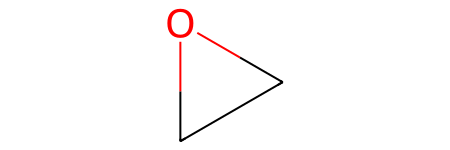

In [17]:
m